In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def SIR_model(num_steps = 100, int_S = 0.8, int_I = 0.2, int_R = 0, beta = 0.04, gamma =0.005):
    SIR =[[int_S], [int_I], [int_R]]

    for step in range(num_steps):
        S, I, R = SIR[0][step], SIR[1][step], SIR[2][step]
        next_S = S*(1-beta*I)
        next_I = I*(1+beta*S -gamma)
        next_R = R + gamma*I

        SIR[0].append(next_S)
        SIR[1].append(next_I)
        SIR[2].append(next_R)

    step_array = [i for i in range(num_steps+1)]
    plt.plot(step_array, SIR[0], label = "Susceptible")
    plt.plot(step_array, SIR[1], label = "Infected")
    plt.plot(step_array, SIR[2], label = "Recovered")
    plt.xlabel("Time step")
    plt.legend()
    plt.ylim(0,1)
    plt.show()

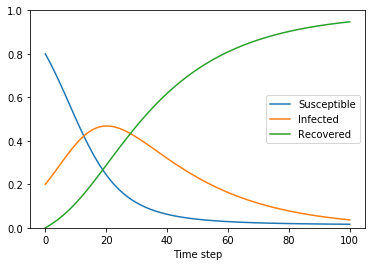

In [18]:
SIR_model(num_steps = 100, int_S = 0.8, int_I =0.2, beta = 0.16, gamma = 0.04)

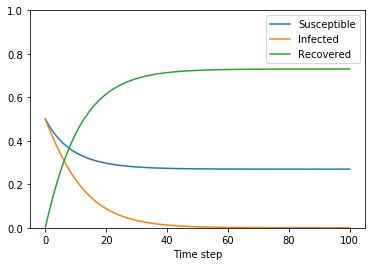

In [19]:
SIR_model(num_steps = 100, int_S = 0.5, int_I =0.5, beta = 0.1, gamma = 0.12)

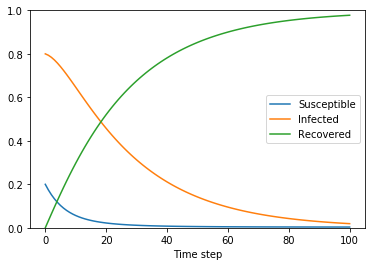

In [20]:
SIR_model(num_steps = 100, int_S = 0.2, int_I =0.8, beta = 0.16, gamma = 0.04)

In [52]:
def SIS_model(num_steps = 100, int_S = 0.8, int_I = 0.2, beta = 0.25, gamma = 0.1):
    SI =[[int_S], [int_I]]

    for step in range(num_steps):
        S, I = SI[0][step], SI[1][step]
        next_S = S*(1-beta*I) + gamma*I
        next_I = I*(1+beta*S - gamma)

        SI[0].append(next_S)
        SI[1].append(next_I)

    step_array = [i for i in range(num_steps+1)]
    plt.plot(step_array, SI[0], label = "Susceptible")
    plt.plot(step_array, SI[1], label = "Infected")
    plt.xlabel("Time step")
    plt.legend()
    plt.ylim(0,1)
    plt.show()


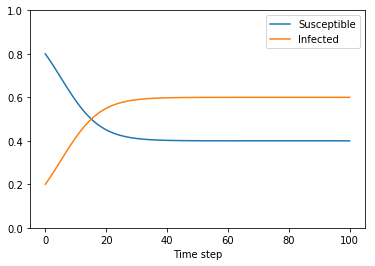

0.5995723113327958


In [55]:
SIS_model()

In [54]:
#analytical solution to SIS model
import numpy as np
beta = 0.25
gamma =0.1
int_I = 0.2
alpha = beta-gamma
t= 49

print(alpha/(beta +alpha*((alpha-int_I*beta)/(alpha*int_I))*np.exp(-alpha*t)))

0.599229878915


In [ ]:
from discreteMarkovChain import markovChain

P =  np.array([[0.5,0.5,0],[0,0.8,0.2],[0.3,0,0.7]])
mc = markovChain(P)
mc.computePi('linear')
print(mc.pi)

In [75]:
def Markov_model(num_steps = 100, int_S = 0.8, int_I = 0.2, int_R = 0):
    SIR =[[int_S], [int_I], [int_R]]

    for step in range(num_steps):
        S, I, R = SIR[0][step], SIR[1][step], SIR[2][step]
        next_S = S*0.5 
        next_I = S*0.5 + I*0.8
        next_R = I*0.2 + R*1

        SIR[0].append(next_S)
        SIR[1].append(next_I)
        SIR[2].append(next_R)

    step_array = [i for i in range(num_steps+1)]
    plt.plot(step_array, SIR[0], label = "Susceptible")
    plt.plot(step_array, SIR[1], label = "Infected")
    plt.plot(step_array, SIR[2], label = "Recovered")
    plt.xlabel("Time step")
    plt.legend()
    plt.ylim(0,1)
    plt.show()

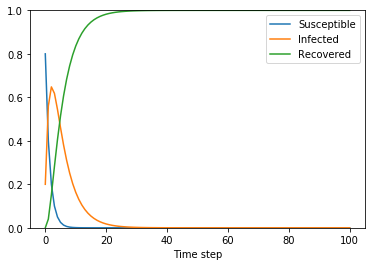

In [76]:
Markov_model()

### CA model

In [ ]:
#this implementation was referencedd from Host & Pathogens model
# Hiroki Sayama (2008-2012)

import matplotlib
matplotlib.use('TkAgg')

import pylab as PL
import random as RD
import scipy as SP
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

RD.seed()

width = 100
height = 100
initProb = 0.01
infectionRate = 0.5
regrowthRate = 0.1

def init():
    global time, config, nextConfig

    time = 0
    
    config = SP.zeros([height, width])
    for x in xrange(width):
        for y in xrange(height):
            if RD.random() < initProb:
                state = 2
            else:
                state = 1
            config[y, x] = state

    nextConfig = SP.zeros([height, width])

def draw():
    PL.cla()
    PL.pcolor(config, vmin = 0, vmax = 2, cmap = PL.cm.jet)
    PL.axis('image')
    red_patch = mpatches.Patch(color='red', label='Infected')
    blue_patch = mpatches.Patch(color='blue', label='Dead')
    green_patch = mpatches.Patch(color='green', label='Susceptible')

    plt.legend(handles=[red_patch, blue_patch, green_patch], loc =4,fontsize = 'xx-small' )
    PL.title('t = ' + str(time))

def step():
    global time, config, nextConfig

    time += 1

    for x in xrange(width):
        for y in xrange(height):
            state = config[y, x]
            if state == 0:
                for dx in xrange(-1, 2):
                    for dy in xrange(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == 1:
                            if RD.random() < regrowthRate:
                                state = 1
            elif state == 1:
                for dx in xrange(-1, 2):
                    for dy in xrange(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == 2:
                            if RD.random() < infectionRate:
                                state = 2
            else:
                state = 0

            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config

def initial(val = initProb):
    '''
    initial probability of infection
    '''
    global initProb
    initProb = float(val) # or float(val), str(val), etc.
    return val

def infection(val = infectionRate):
    '''
    probability of transmitting disease to a neighboring cell
    '''
    global infectionRate
    infectionRate = float(val) # or float(val), str(val), etc.
    return val

def regrowth(val = regrowthRate):
    '''
    probability of stochastically reproducing
    into an empty, neighboring cell
    '''
    global regrowthRate
    regrowthRate = float(val) # or float(val), str(val), etc.
    return val

import pycxsimulator
pycxsimulator.GUI(parameterSetters=[initial, infection, regrowth]
    ).start(func=[init,draw,step])